## BLAST Parameters

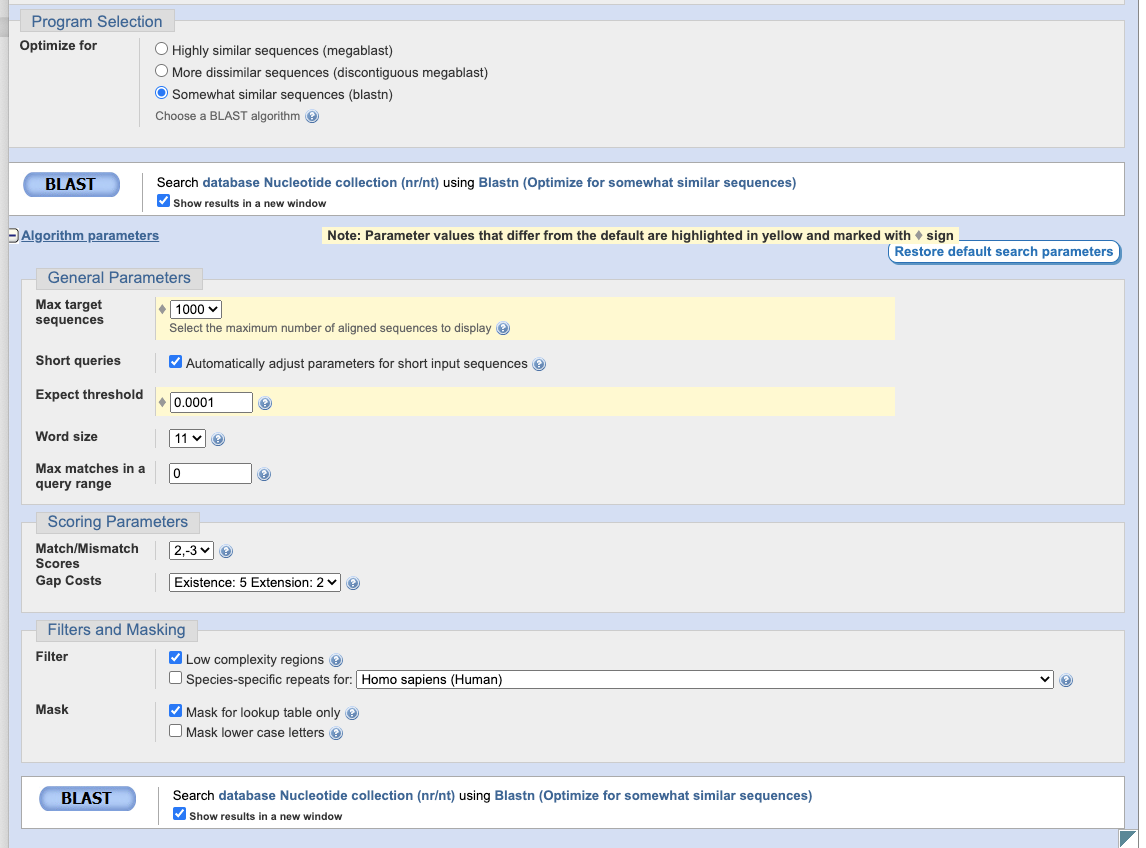

## Command Line Commands

transeq seqdump1.txt

mafft prot_seq1.pet > prot_alignment1.txt


NOTE: seqdump1 includes the week4_query sequence pasted above the first BLAST result. This file was then run through transeq and mafft. 

## Python Scripts

In [1]:
from fasta_iterator_class import FASTAReader
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
nt_sequences=FASTAReader(open("seqdump1.txt",'r'))
protein_alignment=FASTAReader(open('prot_alignment1.txt'))
nt_alignment=open("nt_alignmnet1.fa","w+")
##nt_alignment.write(">query" + '\n')
for nt,prot in zip(nt_sequences,protein_alignment):
    nt_alignment.write('>' + nt[0]+"\n")
    seqwgaps=""
    nt_count=0
    prot_count=0
    protein=prot[1]
    dna=nt[1]
    while prot_count<len(protein):
        if protein[prot_count]=="-":
            seqwgaps+="---"
        else:
            seqwgaps+=dna[nt_count:nt_count+3]
            nt_count+=3
        prot_count+=1
    nt_alignment.write(seqwgaps+"\n")
nt_alignment.close()

In [3]:
gapnt=FASTAReader(open("nt_alignmnet1.fa",'r'))
##query=FASTAReader(open('week4_query.fa', 'r'))


codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}


dN = []
dS = []


ref=''
count=0
query_list = []
for query in gapnt:
    if count<1:
        ref=query[1]
        count+=1

gapped2 = FASTAReader(open("nt_alignmnet1.fa",'r'))
counter=0
for line in gapped2:
    if counter >= 1:
        query_list.append(line[1])
    counter+=1

        
for codon in range(0, len(ref), 3):

    dS_temp = 0
    dN_temp = 0
    
    if ref[codon:codon+3] == '---': 
    ##or ref[codon:codon+3] not in codontable:
        pass
    
    else:
        
        nuc1 = ref[codon:codon+3]
        ref_aa = codontable[nuc1]
        
        for compare in query_list:
            
            if compare[codon:codon+3] == '---' or compare[codon:codon+3] not in codontable:
                
                pass
            
            else:
                
                nuc2 = compare[codon:codon+3]
                query_aa = codontable[nuc2]
    
        
                if (nuc1 != nuc2) and (ref_aa == query_aa):
                    dS_temp += 1

                elif (nuc1 != nuc2) and (ref_aa != query_aa):
                    dN_temp += 1
                
        dS.append(dS_temp)
        dN.append(dN_temp)

            


In [4]:
np.sum(dS)

303882

In [47]:
dN_dS = []
for n,s in zip(dN,dS):
    dN_dS.append(n-s)
    
std=np.std(dN_dS)
zscore= []
for codon in dN_dS:
    zscore.append(codon/std)
p_values = (sts.norm.sf(zscore)) * 2

In [48]:
p_values

array([9.58657314e-05, 8.57664270e-01, 1.30983912e-04, ...,
       6.76577136e-03, 8.48999941e-03, 5.51314724e-03])

Text(0, 0.5, 'log2 dN/dS')

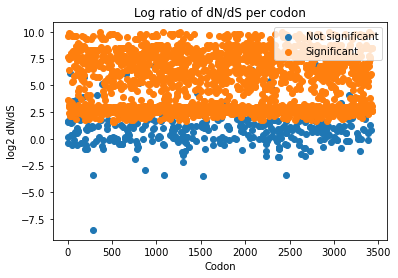

In [55]:
codon=[]
codon_sig = []
dNdS=[]
dNdS_sig  = []
for i in range(len(dN)):
    if dN[i]!=0 and dS[i]!=0 and p_values[i] > 0.05:
        dNdS.append(math.log((dN[i]/dS[i]),2))
        codon.append(i)
    elif dN[i]!=0 and dS[i]!=0 and p_values[i] < 0.05:
        dNdS_sig.append(math.log((dN[i]/dS[i]), 2))
        codon_sig.append(i)
plt.scatter(codon,dNdS, label = "Not significant")
plt.scatter(codon_sig,dNdS_sig, label = "Significant")
plt.title("Log ratio of dN/dS per codon")
plt.legend(loc = 'upper right')
plt.xlabel("Codon")
plt.ylabel("log2 dN/dS")